## 可以通过三种方式实现制图

- pyplot
- 面向对象编程
- pylab

#### 主要是使用pyplot和面向对象方式

#### pyplot

以绘制点线图为例（plt.plot()），一下内容可分为
- 基础绘制（绘制一张图）
- 调整图形外观
- 绘制多个图（不同的画布和同一张画布上多个图像）

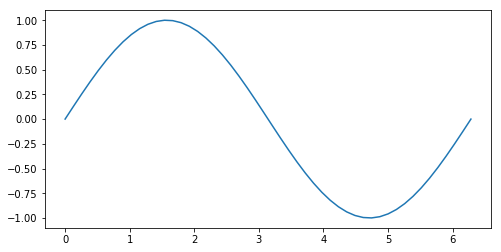

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# 设置图片大小，长度为8，高度为4
plt.rc('figure', figsize=(8, 4))

# 绘制[0, 2pi]上的正弦曲线
x = np.linspace(0, 2 * np.pi, num=50)
# linspace的作用是创建一个等差数列，此处创建一个0到2pi的，50个数的
# 等差数列
plt.plot(x, np.sin(x))
plt.show()

# plot就是用来绘制点线图，基础用法就是传入x和y坐标的值即可

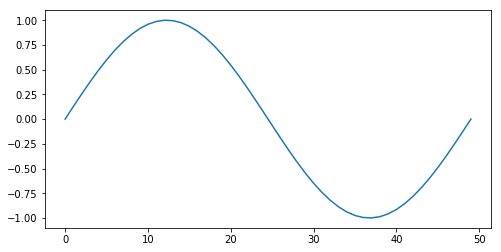

In [16]:
# 如果没有第一个参数 x，图形的 x 坐标默认为数组的索引,0~ 50
plt.plot(np.sin(x))
plt.show()

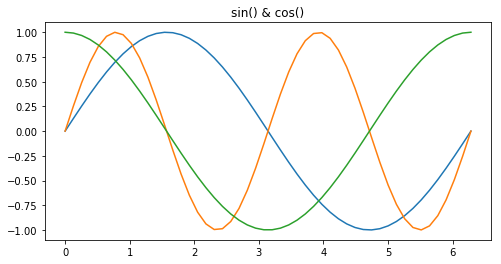

In [25]:
# 在plot中传入多组参数, 成对传入即可
plt.plot(x, np.sin(x), x, np.sin(2 * x), x, np.cos(x))
plt.title('sin() & cos()')
plt.show()

In [24]:
# 获取当前的图表
plt.gcf()
# 获取当前子图
plt.gca()
# 清空当前 figure
plt.clf()
# 清空plt绘制的内容
plt.clf()
# 关闭图 0
plt.close(0)
#  关闭所有图
plt.close('all')
# 获取当前figure的引用，设置图片大小
plt.gcf().set_size_inches(16,8)

<Figure size 1152x576 with 0 Axes>

### 关于曲线外观的一些参数

关于外形的几个参数分别有

plot(x, y, color='', marker='', linestyle='', linewith='', markersize='')

- color:图形颜色
- marker：坐标点的形状
- linestyle：连接坐标的线的形状（实线，虚线， 虚点相间，点线）
- linewidth：线宽
- markesize：坐标点的大小

前三个（color，marker， linestyle可以连起来写）

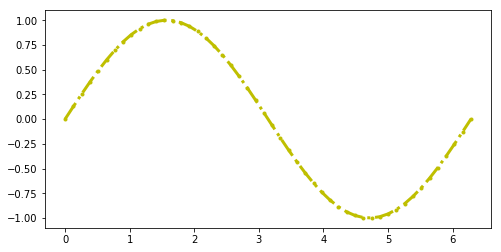

In [109]:
x = np.linspace(0, 2 * np.pi, 50)
plt.plot(x, np.sin(x), color='y',
         marker='o',
         linestyle='-.',
         linewidth=3,
         markersize=3)
plt.show()

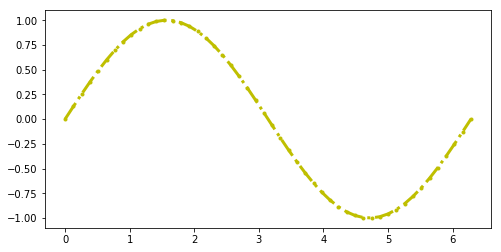

In [104]:
# 以上也可以写成,将color，linestyle，marker合起来
plt.plot(x, np.sin(x), 'y-.o',linewidth=3, markersize=3)
plt.show()

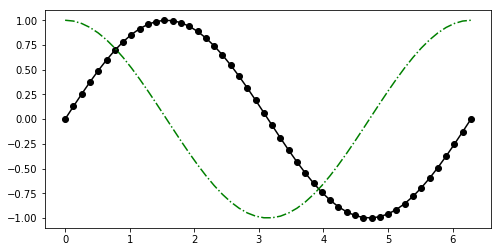

In [105]:
plt.plot(x, np.sin(x), 'k-o', x, np.cos(x), 'g-.');

### 颜色

颜色|字符
-|-
蓝色|b
绿色|g
红色|r
青色|c
品红|m
黄色|y
黑色|k（'b'代表蓝色，所以这里用黑色的最后一个字母）
白色|w

### 线型

***
线型|标记
-|-
直线|-
虚线|--
点线|:
点划线|-.

### 坐标点形状

***
点标记名称|标记
-|-
点|.
像素|,
圆|o
方形|s’
三角形(向下，上，左，右)|v, ^, <, >
三角星（向下，上，左，右）|1, 2, 3, 4
五角形|p
星形|*
六角形|h
六角形|H
加号|+
x号|x
菱形|D
窄菱形|d
竖线|竖线
横线|_

### 以上就是绘制图形的基本方法，下面写一些细化的功能

### subplot和subplots实现方法是有差异的

### subplot subplots
- subplot

创建多张图标，并且选择不同图表绘制不同的内容

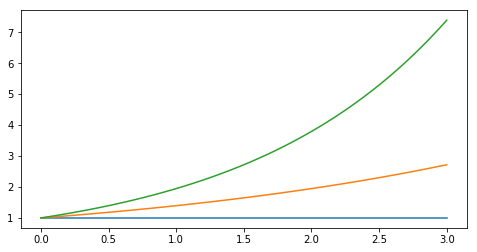

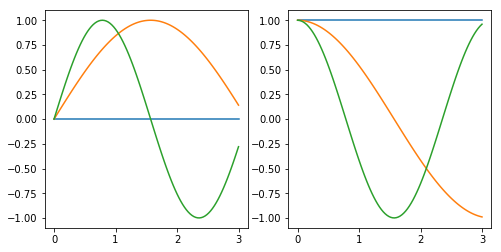

In [70]:
plt.figure(1) # 创建图表1
plt.figure(2) # 创建图表2
# 此处之所以要先创建表 1， 是因为要占用第一行的位置

# 默认操作最新创建的图
ax1 = plt.subplot(1,2,1) # 在图表2中创建子图1
ax2 = plt.subplot(1,2,2) # 在图表2中创建子图2

x = np.linspace(0, 3, 100)
# 每张图里面绘制三条曲线
for i in range(3):
    plt.figure(1)  # 因为已经创建了 1，此处可以理解为选择图表1
    plt.plot(x, np.exp(i*x/3))
    
#   sca用来选择“子图”！
    plt.sca(ax1)  # 选择图表2的子图1
    plt.plot(x, np.sin(i*x))
    
    plt.sca(ax2)  # 选择图表2的子图2
    plt.plot(x, np.cos(i*x))
plt.show()

- subplots

In [71]:
plt.subplots?

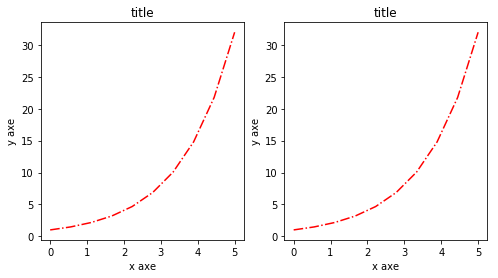

In [140]:
# subplots会返回两个值：画布和子表
x = np.linspace(0, 5, 10)
y = 2 ** x

fig, axes = plt.subplots(1, 2)   #一行两列

for ax in axes:
    ax.plot(x, y, 'r-.')
    ax.set_xlabel('x axe')
    ax.set_ylabel('y axe')
    ax.set_title('title')

plt.show()

也可以使用数组下标访问每个子表

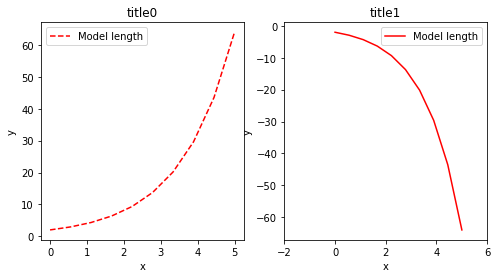

In [145]:
x = np.linspace(0, 5, 10)
y = 2 ** x

fig, axes = plt.subplots(1, 2)   #一行两列

axes[0].plot(x, 2*y, 'r--', label='Model length')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('title0')
axes[0].legend()

axes[1].plot(x, -2*y, 'r', label='Model length')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('title1')
axes[1].set_xlim(-2,6)
axes[1].legend()

- 设计坐标轴名称
- 图标的title
- 每条曲线的名称
- 共享坐标轴

subplot方法

In [125]:
plt.subplot?

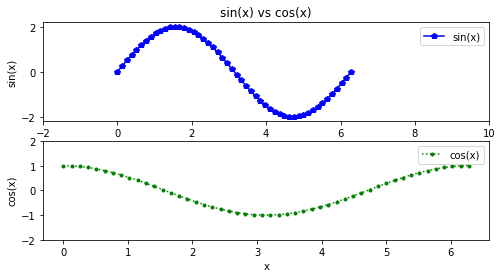

In [139]:
x = np.linspace(0, 2 * np.pi, 50)

a1 = plt.subplot(2, 1, 1)    # 2行1列，选择第一个子表

# label用来设置图线名称
plt.plot(x, 2 * np.sin(x), 'b-p', label='sin(x)')

# 为图表添加标题
plt.title('sin(x) vs cos(x)')

# 为纵坐标添加名称
plt.ylabel('sin(x)')

# 设置X轴的范围
plt.xlim(-2,10)

# 用来显示lable的内容，不填参数的话默认选取位置
plt.legend()

# 指向第二个绘图子区
plt.subplot(2, 1, 2)

plt.plot(x, np.cos(x), 'g.:', label='cos(x)')

# 添加纵横坐标标签
plt.xlabel('x')
plt.ylabel('cos(x)')

# 设置Y轴的范围
plt.ylim(-2,2)

plt.legend()

plt.show()

关于legend一些用法见下例（官网下载的）

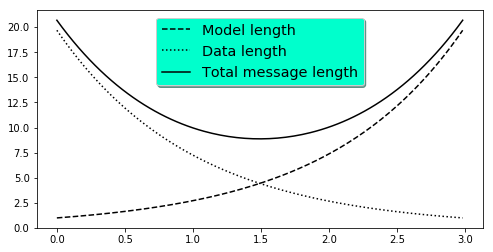

In [117]:
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

### 对比两个实现方式，几乎相同，只是设置时subplots需要接受返回值，来设置（当然subplot也可以被接收，返回值是一个图表）相应的属性，subplots需要使用 ‘set_xxx’ 来设置，而subplot直接使用 ‘xxx’来设置

### 共享坐标轴，调整坐标轴或者子图之间的间距

- 使用 plt.subplots_adjust

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

参数|说明
-|-
left  = 0.125|左边框位置
right = 0.9|右边框位置
top = 0.9|上边框位置
bottom = 0.1|下边框位置
wspace = 0.2|子绘图区之间预留空白空间的宽度，为平均轴宽的一小部分。
hspace = 0.2|子绘图区之间预留空白空间的高度，为平均轴宽的一小部分。

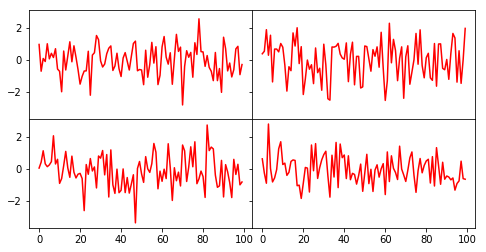

In [148]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i][j].plot(np.random.randn(100), 'r')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()